# Introduction to Information Theory

A quick reminder video: https://youtu.be/kzsrbnWzvbE

## Information

In the field of information theory, _information_ is thought of as a set of possible symbols chosen from an alphabet, that a transmitter needs to specify to a receiver. The fundamental unit of information is the _bit_, the quantity of information needed to distinguish between two likely events. The bit of information can take decimal values, so values like 0.3 bits are perfectly valid. 

For example, if we consider all 26 lowercase letters from the English alphabet, the number of bits of information needed to transmit a letter is:

In [1]:
import math
math.log2(26)

4.700439718141092

More generally, if an event $E$ is transmitted from the set of all possible events, then the quantity of information transmitted, measured in bits, is:
    
$$
\begin{align}
  I(E) = log_2\frac{1}{P(E)}
\end{align}
$$

where $P(E)$ is the probability of the event $E$.

---
**Give it a try!**

How many bits are needed to transmit the outcome of a die throw?

In [2]:
# Your code here

Expected result: ~2.584 bits

---

## Entropy

A key concept from the field of information theory that is particularly useful in machine learning, is the concept of _entropy_, which provides the theoretical maxima for data compression.

The entropy is simply the average number of bits needed to transmit any letter, accounting for its probability. So if all 26 letters of the alphabet are equally likely, the entropy is the same as the logarithm base 2.

We can check this with the entropy function:

In [3]:
from scipy.stats import entropy
p = [1/26]*26 # All letters have the same probability
entropy(p, base=2)

np.float64(4.7004397181410935)

However, if some letters are more likely than others, fewer bits are needed. Let's say that 'e' is twice more likely to appear. Its probability would then change from $\frac{1}{26}$ to $\frac{2}{26}$ while all other letters would now be proportionally less likely. We then expect the entropy to decrease slightly:

In [4]:
p_e = 2/26 # Probability of 'e'
p_any = (1 - p_e) / 25 # Probability of other letters
entropy([p_any]*25+[p_e], base=2)

np.float64(4.677880046498233)

This is where the concept of entropy proves useful. Simply applying the logarithm, we can find how many bits are needed to represent a symbol in binary, even if that symbol is almost never used. But since entropy also accounts for the probability of that symbol, it gives a theoretical lower bound for any compression algorithm.

Another interpretation of entropy is that it measures uncertainty. Intuitively, if we had 26 letters but we only ever used two of them, the entropy of this alphabet is very small as we are certain about 24 of the symbols and we only need to decide between the remaining two.

Formally, the alphabet of English letters can be generalised as the sample space of a discrete random variable $X$, with a corresponding probability mass function $p(x)$:

\begin{align}
  p(x) = P(X = x), x \in X
\end{align}

The entropy of the random variable $X$ is then defined as the average quantity of information $I$ required to transmit every symbol in the alphabet:


\begin{align}
  H(p) = H(X) &= E[I] \\
  &= \sum_{x \in X} p(x) I(x) \\
  &= \sum_{x \in X} p(x) log_2\frac{1}{p(x)} \\
  &= - \sum_{x \in X} p(x) \log_2p(x)
\end{align}


where $p$ is the probability mass function of the random variable $X$ and $0\log0$ is considered to be 0.

We can implement this definition directly:

In [5]:
def H(p):
    log_zero = lambda x: 0 if x == 0 else math.log2(x)
    return -sum(i*log_zero(i) for i in p)

and test it against the library version:

In [6]:
p = [1/26] * 26 + [0]
print(H(p))
print(entropy(p, base=2))

4.700439718141092
4.7004397181410935


---
**Give it a try!**

What is the entropy of the morse code alphabet, if a 'dot' is twice as likely as a 'dash'?

In [7]:
# Your code here

Expected result: ~0.918 bits

---

## Conditional Entropy

If the entropy measures the uncertainty of a random variable $X$ (e.g. a letter of the alphabet), the _conditional entropy_ is the remaining uncertainty after we learn something more about the data which can be modeled as a second random variable $Y$ (e.g. the letters are not transmitted at random, they represent words in either Italian or English).

If we know nothing about the language, we can assume any letter is equally likely in the message, therefore all probabilities are equal, and our entropy is 

In [8]:
p = [1/26] * 26
H(p)

4.700439718141092

However if we know that the language is Italian, we could expect vowels to be more frequent:

In [9]:
p_vowel = 2/26
p_rest = (1 - p_vowel*5) / 21
p_italian = [p_vowel] * 5 + [p_rest] * 21
H(p_italian)

4.5572504398510985

And if we knew that the language is English, we could expect 't' and 'h' to be more frequent:

In [10]:
p_th = 3/26
p_rest = (1 - p_th*2) / 24
p_english= [p_th] * 2 + [p_rest] * 24
H(p_english)

4.537013299385282

Note that in both cases, the entropy is smaller. These are called _specific conditional entropies_, since they measure the entropy of symbols in a specific language.

The conditional entropy answers the more general question: how many bits of information would be needed to encode a message, if we knew the language? Note that this is not the same as knowing _which_ language was used (either English or Italian), just that one of the languages was used.

This can be simply calculated as the weighted average of the two entropies above, considering that the languages themselves have their own probabilities (i.e. the text is more likely to be in English than in Italian).

For instance, if English is three times more likely, the conditional entropy would become:

In [11]:
H_p_given_language = H(p_italian) * 0.25 + H(p_english) * 0.75
H_p_given_language

4.542072584501736

We can conclude that knowing the language in which a message is transmitted, reduces the number of bits required for encoding.

Using formal notation, we can model the letters of the alphabet as the random variable $X$ with all probabilities equal, and the language as the random variable $Y$. `H(p_italian)` and `H(p_english)`, formally written as $H(X | Y = italian)$ and $H(X | Y = english)$, are called _specific conditional entropies_ defined as:

\begin{align}
H(X | Y = y) = - \sum_{x \in X}p(x | y) \log_2 p(x|y)
  \end{align}

The conditional entropy of $X$ given $Y$ is then defined as:

\begin{align}
H(X|Y) = \sum_{y \in Y} p(y)H(X|Y=y)       
\end{align}

---
**Give it a try!**

Given a random variable $X$ corresponding to the current season (spring, summer, autumn or winter), and variable $Y$ corresponding to the temperature (low or high). Knowing that:
* when the temperature is low, it is twice as likely to be winter than summer,
* when the temperature is high, it is twice as likely to be summer than winter

calculate:

1. the entropy of $X$, $H(X)$;
1. the entropy of $X$ knowing that the temperature is low, $H(X|Y=low)$ and similar for 'high';
1. the conditional entropy of $X$ given $Y$, $H(X|Y)$.

In [12]:
# Your code here

Expected result: 

1. 2 bits
1. ~1.959 bits
1. ~1.959 bits

---

## Information gain

The _information gain_ (also called _mutual information_) is the amount of information gained about a variable by knowing the outcome of another variable. In our example, the information gained by knowing the language is the difference between the entropy of the alphabet and the entropy of the alphabet when the language is known (i.e. the conditional entropy of the alphabet given the language):

In [13]:
IG = H(p) - H_p_given_language
IG

0.15836713363935573

This is written formally as:

\begin{align}
IG(X;Y) = H(X) - H(X|Y)
\end{align}

The alternative name _mutual information_ suggests an interesting property that can be easily derived from the definitions above: symmetry regarding order of variables. In other words, the information gained about the alphabet by knowing the language is the same as the information gained on the language by knowing the alphabet: $IG(X;Y) = IG(Y;X)$.

# Decision Trees

Decision trees are the models behind some of the most common regression and classification algorithms. The nodes of the tree represent features, and the branches represent splits by different values of those features. They have two primary uses:

* when the target is known: to understand the relationship between the predictors and the target;
* when the target is not known: to predict the target.

As a simple example, we can consider a dataset with descriptions of various mushrooms and whether or not they are edible:

In [14]:
import pandas as pd
features = ['Weight', 'Smell', 'Spots', 'Smooth', 'Edible']
mushrooms = pd.DataFrame([
  (1, 0, 0, 0, 1),
  (1, 0, 1, 0, 1),
  (0, 1, 0, 1, 1),
  (0, 0, 0, 1, 0),
  (1, 1, 1, 0, 0),
  (1, 0, 1, 1, 0),
  (1, 0, 0, 1, 0),
  (0, 1, 0, 0, 0)
],
index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
columns=features)
print(mushrooms)

   Weight  Smell  Spots  Smooth  Edible
A       1      0      0       0       1
B       1      0      1       0       1
C       0      1      0       1       1
D       0      0      0       1       0
E       1      1      1       0       0
F       1      0      1       1       0
G       1      0      0       1       0
H       0      1      0       0       0


Using the `DecisionTreeClassifier` from `sklearn`, we can learn a decision tree with:

In [15]:
from sklearn import tree
X = mushrooms[['Weight', 'Smell', 'Spots', 'Smooth']]
y = mushrooms['Edible']
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X,y)

And with `matplotlib` we can visualise it:

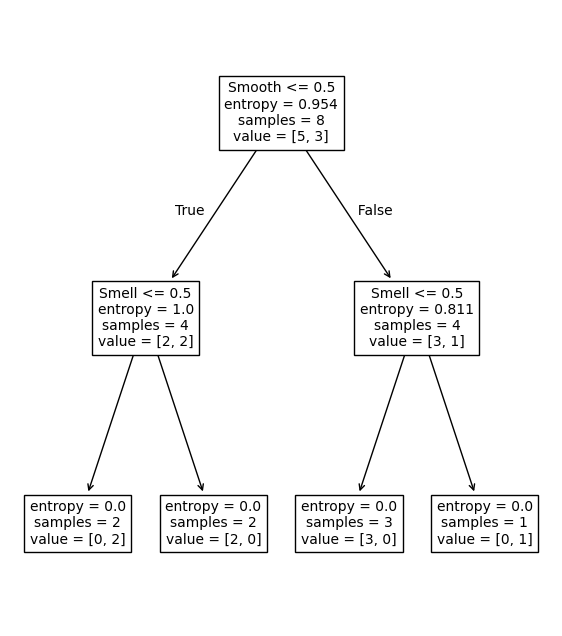

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 8))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=features)
plt.show()

At each step, information gain is used to decide which variable best separates the edible mushrooms from the poisonous ones.

The tree can be simply read like a sequence of 'if' statements. Following the branches in the tree above, from top to bottom we have:

* "if Smooth is 0 and Smell is 0, all mushrooms are edible";
* "if Smooth is 0 and Smell is 1, all mushrooms are poisonous";
* "if Smooth is 1 and Smell is 0, all mushrooms are poisonous";
* "if Smooth is 1 and Smell is 1, all mushrooms are edible";

Interestingly, the algorithm that learned this decision tree ignored the _Weight_ and _Spots_ features. As it turned out, based on the available data, they are not needed to decide whether the mushroom is poisonous or not.

The distinction between correlation and causality is important here. Just because we can distinguish between edible and poisonous mushrooms using two properties, it does not mean that those properties _make_ it poisonous. It could just be a coincidence or some unknown cause could be behind both effects. A domain expert (in this case, a biologist) would ideally help interpret the findings of the machine learning algorithm.

Different algorithms can create different decision trees from the same data. There are generally two criteria for choosing one solution over another:

* model performance, or how well it can predict new data;
* model size, or how many splits are being used throughout the model.

Most algorithms will focus on performance but will have a parameter that will allow adjusting model size, sometimes at the cost of some of that performance.

---
**Give it a try!**

1. Calculate the entropy of Edible for the root node, $H(Edible)$.
1. Calculate the information gain brought by the variable Smooth, $IG(Edible;Smooth)$.

In [17]:
# Your code here

Expected results: 

```
H(Edible) ~= 0.954
IG(Edible; Smooth) ~= 0.048
```
---